# PIMP MY PIANO VelocityDev#

## Settings and Methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
MAX_DURATION = 300
MIN_DURATION = 3

In [3]:
# Map a value from one range (f and t) into another one (maxLim and minLim)
def map(x, f, t, minLim, maxLim):
    return (t + (f - t) * ((x - minLim) / (maxLim - minLim)));

In [4]:
# print given array in the folling format: { x_0, x_1, x_2, x_3, x_4 };
def printAsCArray(h):
    string = "{"
    for i in h:
        string = string + str(int(np.round(i))) + ", "
    string = string[:-2] + "};"
    print(string)

In [5]:
# tranform a given duration time x to a velocity value between 0 and 127
def getVelo(x):
    return map(x, 1, 127, MIN_DURATION, MAX_DURATION)

## Linear velocity

{127, 127, 126, 126, 125, 125, 124, 124, 124, 123, 123, 122, 122, 121, 121, 121, 120, 120, 119, 119, 119, 118, 118, 117, 117, 116, 116, 116, 115, 115, 114, 114, 113, 113, 113, 112, 112, 111, 111, 110, 110, 110, 109, 109, 108, 108, 107, 107, 107, 106, 106, 105, 105, 105, 104, 104, 103, 103, 102, 102, 102, 101, 101, 100, 100, 99, 99, 99, 98, 98, 97, 97, 96, 96, 96, 95, 95, 94, 94, 93, 93, 93, 92, 92, 91, 91, 91, 90, 90, 89, 89, 88, 88, 88, 87, 87, 86, 86, 85, 85, 85, 84, 84, 83, 83, 82, 82, 82, 81, 81, 80, 80, 79, 79, 79, 78, 78, 77, 77, 77, 76, 76, 75, 75, 74, 74, 74, 73, 73, 72, 72, 71, 71, 71, 70, 70, 69, 69, 68, 68, 68, 67, 67, 66, 66, 65, 65, 65, 64, 64, 63, 63, 63, 62, 62, 61, 61, 60, 60, 60, 59, 59, 58, 58, 57, 57, 57, 56, 56, 55, 55, 54, 54, 54, 53, 53, 52, 52, 51, 51, 51, 50, 50, 49, 49, 49, 48, 48, 47, 47, 46, 46, 46, 45, 45, 44, 44, 43, 43, 43, 42, 42, 41, 41, 40, 40, 40, 39, 39, 38, 38, 37, 37, 37, 36, 36, 35, 35, 35, 34, 34, 33, 33, 32, 32, 32, 31, 31, 30, 30, 29, 29, 29, 28

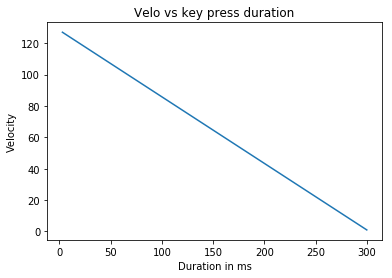

In [6]:
times = np.arange(MIN_DURATION, MAX_DURATION+1)
velo1 = getVelo(times)

df = pd.Series(velo1, index=times)
plt.title("Velo vs key press duration")
plt.xlabel("Duration in ms")
plt.ylabel("Velocity")
df.plot()

printAsCArray(velo1)

## Non-Linear Velocity

### velo2
#### More weight on higher duration to make silent play easier


In [7]:
timesNorm = map(times, 0, 1, MIN_DURATION, MAX_DURATION)

{127, 126, 124, 123, 122, 121, 119, 118, 117, 116, 115, 113, 112, 111, 110, 109, 108, 106, 105, 104, 103, 102, 101, 100, 99, 98, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 70, 69, 68, 67, 66, 65, 65, 64, 63, 62, 61, 61, 60, 59, 58, 57, 57, 56, 55, 54, 54, 53, 52, 52, 51, 50, 50, 49, 48, 48, 47, 46, 46, 45, 44, 44, 43, 42, 42, 41, 41, 40, 39, 39, 38, 38, 37, 37, 36, 35, 35, 34, 34, 33, 33, 32, 32, 31, 31, 30, 30, 29, 29, 28, 28, 27, 27, 26, 26, 26, 25, 25, 24, 24, 23, 23, 23, 22, 22, 21, 21, 21, 20, 20, 19, 19, 19, 18, 18, 18, 17, 17, 17, 16, 16, 16, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

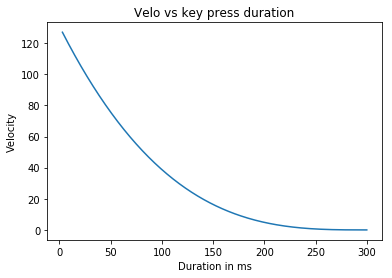

In [17]:
def funcVelo2(x):
    return (x * x * x) * (1)

def funcExp(x):
    return np.exp(x*(4))

newTimes = funcVelo2(timesNorm)

velo2 = map(newTimes, 0, 127, np.max(newTimes), np.min(newTimes))

df = pd.Series(velo2, index=times)
plt.title("Velo vs key press duration")
plt.xlabel("Duration in ms")
plt.ylabel("Velocity")
df.plot()

printAsCArray(velo2)

### velo3

{127, 125, 123, 121, 118, 116, 114, 112, 110, 108, 106, 104, 102, 100, 98, 96, 95, 93, 91, 89, 87, 86, 84, 82, 80, 79, 77, 76, 74, 72, 71, 69, 68, 66, 65, 64, 62, 61, 59, 58, 57, 56, 54, 53, 52, 51, 50, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 34, 33, 32, 31, 30, 30, 29, 28, 27, 27, 26, 25, 25, 24, 23, 23, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 16, 16, 15, 15, 14, 14, 14, 13, 13, 12, 12, 12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 7, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

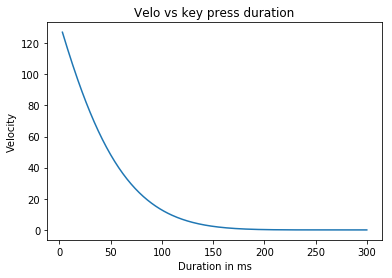

In [58]:
def funcVelo3(x):
    return np.power(x,4)

def funcExp(x):
    return np.exp(x)

def sigmoid(x):
    return 1/(1+np.exp(-np.power(x,6)))

newTimes = sigmoid(timesNorm)

velo3 = map(newTimes, 0, 127, np.max(newTimes), np.min(newTimes))

df = pd.Series(velo3, index=times)
plt.title("Velo vs key press duration")
plt.xlabel("Duration in ms")
plt.ylabel("Velocity")
df.plot()

printAsCArray(velo3)